# Colab用の設定

In [1]:
!pip install nipy

# Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import scipy.signal as signal
import nipy.modalities.fmri.hrf as hrf

# Config

In [3]:
np.random.seed(0)

# Function

In [4]:
def create_stimulus(times_range: list[int], times_interval: int|float, onsets_range: list[int], plot: bool = True) -> tuple[np.ndarray, np.ndarray]:
    """
    Create a stimulus design with onsets at specified times.
    Parameters
        times_range: The range of times to create the stimulus design.
        times_interval: The interval between each time point.
        onsets_range: The range of onsets to create in the design.
        plot: Whether to plot the stimulus design.
    Returns
        times: The time points of the stimulus design.
        stimulus: The stimulus
    """
    
    times = np.arange(times_range[0], times_range[1], times_interval)
    stimulus = np.zeros(len(times))

    onsets_range = list(range(onsets_range[0], onsets_range[1]))
    for onset in onsets_range:
        stimulus[onset] = 1

    if plot:
        plt.figure(figsize=(8, 3))
        plt.plot(times, stimulus)
        plt.xlabel('Time (s)')
        plt.ylabel('Stimulus')
        plt.title('Stimulus Design')
        plt.show()

    return times, stimulus

def create_simulated_data(times_range: list[int], times_interval: int|float, onsets_range: list[int], noise_std: float = 0.3, plot: bool = True) -> tuple[np.ndarray, np.ndarray]:
    """
    Create simulated data with a stimulus design and noise.
    Parameters
        times_range: The range of times to create the data.
        times_interval: The interval between each time point.
        onsets_range: The range of onsets to create in the design.
        noise_std: The standard deviation of the noise.
        plot: Whether to plot the simulated data.
    Returns
        times: The time points of the data.
        data: The simulated data.
    """
    times, stimulus = create_stimulus(times_range, times_interval, onsets_range, plot=False)
    data = stimulus + np.random.normal(0, noise_std, len(times))

    if plot:
        plt.figure(figsize=(8, 3))
        plt.plot(times, data)
        plt.xlabel('Time (s)')
        plt.ylabel('Data')
        plt.title('Simulated Data')
        plt.show()

    return times, data

def create_hrf(times_range: list[int], times_interval: int|float, plot: bool = True) -> tuple[np.ndarray, np.ndarray]:
    """
    Create a hemodynamic response function.
    Parameters
        times_range: The range of times to create the HRF.
        times_interval: The interval between each time point.
        plot: Whether to plot the HRF.
    Returns
        times: The time points of the HRF.
        hrf_signal: The HRF signal.
    """
    times = np.arange(times_range[0], times_range[1], times_interval)
    hrf_signal = hrf.spm_hrf_compat(times)

    if plot:
        plt.figure(figsize=(8, 3))
        plt.plot(times, hrf_signal)
        plt.xlabel('Time (s)')
        plt.ylabel('HRF')
        plt.title('Hemodynamic Response Function')
        plt.show()

    return times, hrf_signal

def convolve_stimulus_hrf(stimulus: np.ndarray, hrf_signal: np.ndarray, plot: bool = True) -> np.ndarray:
    """
    Convolve a stimulus design with a hemodynamic response function.
    Parameters
        stimulus: The stimulus design.
        hrf_signal: The HRF signal.
        plot: Whether to plot the convolved signal.
    Returns
        convolved: The convolved signal.
    """
    convolved = signal.convolve(stimulus, hrf_signal, mode='full')

    if plot:
        plt.figure(figsize=(8, 3))
        plt.plot(convolved)
        plt.xlabel('Time (s)')
        plt.ylabel('Convolved')
        plt.title('Stimulus Convolved with HRF')
        plt.show()

    return convolved

# Create GLM

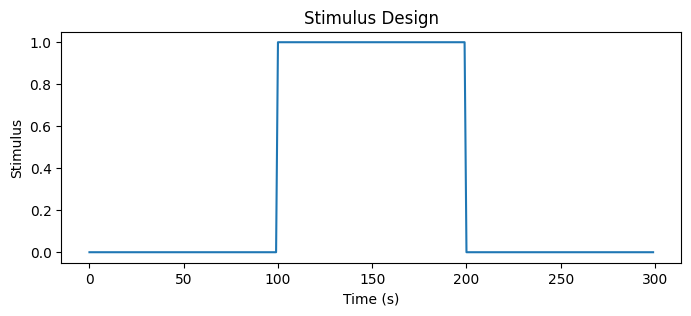

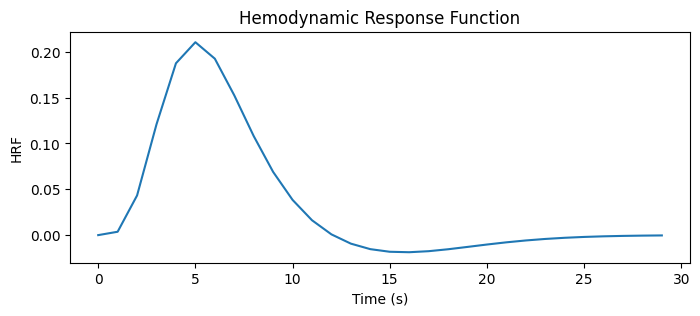

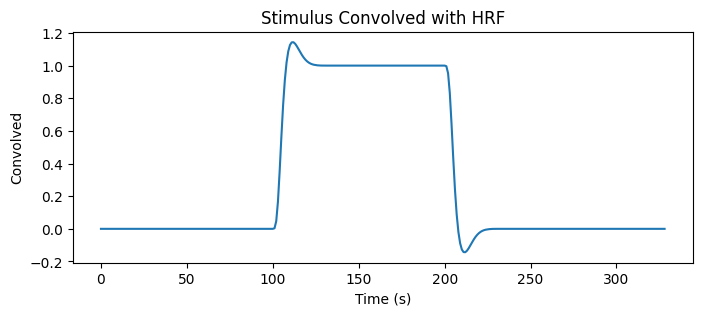

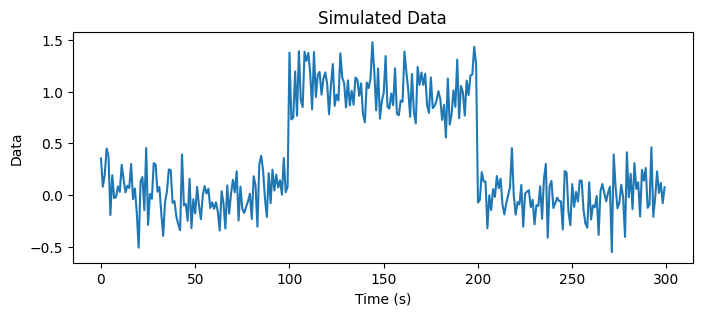

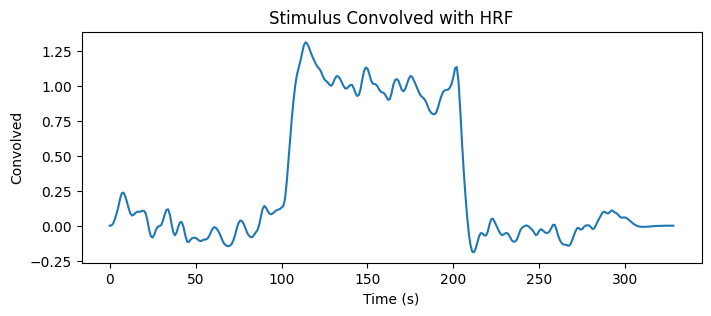

In [5]:
times, stimulus = create_stimulus([0, 300], 1, [100, 200])
hrf_times, hrf_signal = create_hrf([0, 30], 1)
result = convolve_stimulus_hrf(stimulus, hrf_signal)

times, data = create_simulated_data([0, 300], 1, [100, 200], 0.2)
result = convolve_stimulus_hrf(data, hrf_signal)